# Probability and Stochastic Processes 2024-25: **Problem Set 1**

Provide a solution to the following exercises.

Some rules:

- You should **use the libraries that we have seen** during our tutorials. If you want to provide another solution (which uses different libraries or concepts that we have not seen together) you can do so, but you will need to ALSO write down a solution that uses the concepts seen in class. Providing more than one solution will not receive extra points.

- You might need some formulas (theorems, definitions, properties...) coming from our lectures. Whenever your solution is backed up by a formula that we have seen during a lecture, write a comment citing - if available - the number of the book corresponding to this formula (for example, if you are using the theorem of continuity of probability measure, write down "by the thm of continuity of probability measure 1.54").

- **Comment** the code explaining the passages that you followed using the # command in the code cell. Code comments are for short explanations. If you want to write a "text-heavy" answer, then I suggest you use a markdown cell.

- The output of your code should solely be the answers to the questions (this means that you should not print extra things or plots). In general, **be tidy**!

- Before you submit the notebook, be sure to **compile it** (i.e., you should run all the code before downloading your notebook, so that I can see your output and do not have to re-run it).

- When you are simulating replicas of experiments, you can use the number 1000.

In [1]:
# Libraries to work on the exercises
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
num_experiment = 1000

# Rome, 11/11/2024
# ID 1701609

It might come in handy to use the `while` command. A `while` statement is used for repeated execution as long as an expression (written right after the `while` command) is true (alternatively, you can use the `break` command to exit a for loop...we have seen it in the first weeks). For an example, see below:

In [2]:
def assign_grade(initial_grade, p):
  grade = initial_grade
  reply = False
  num_wrong_ans = 0
  while (reply is False) and (num_wrong_ans < 3): # Python repeats this part until reply is wrong and the number of questions is less than 4
      question = stats.randint(0, 30).rvs() # generate a random question
      print('Question n.' + str(question))
      reply = stats.bernoulli(p).rvs() # reply of the student
      print('Reply n.' + str(reply))
      grade -= (1 - reply) * (initial_grade - 18)/3 # update the grade
      print('Grade is ' + str(grade))
      num_wrong_ans = num_wrong_ans + 1
  return grade, num_wrong_ans

print(assign_grade(30, 0.1))
# print(assign_grade(28, 0.9))

Question n.29
Reply n.0
Grade is 26.0
(26.0, 1)


# 1 - Minimum grade of the exam [full marks: 10]

The 40 students enrolled in PSP 2024 will take the exam in January. Each of them will receive a grade between 0 (I really hope nobody gets this grade) and 30.
Let's assume that the grades are independent and identically distributed as a Truncated Normal (look this up!) with mean 23 and variance 5 and support over [0, 30] (therefore, we assume that the grades take continuous values).

1. Plot the PDF and the CDF of the grade of one of the students, using the methods for random variables (i.e., do not simulate). [max 4 points]

2. Design an experiment to estimate the cumulative distribution function of the minimum of the grades. Plot this empirical CDF against the theoretical CDF. [3]

3. What is the probability that the minimum of the grades is less than 18? And between 18 and 20? Find both the empirical (using the simulations of point 2) and theoretical values of these probabilities. [3]

<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>


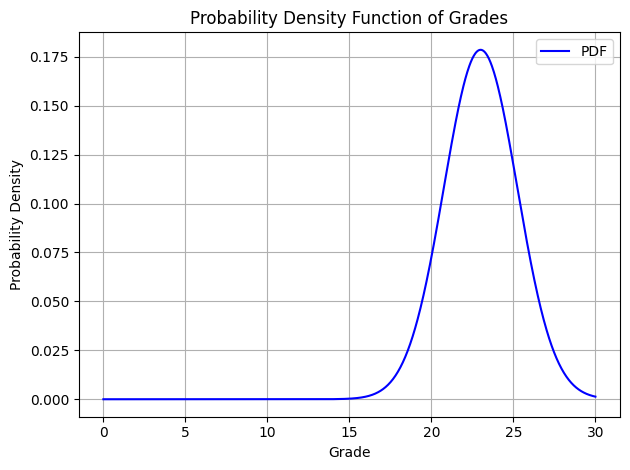

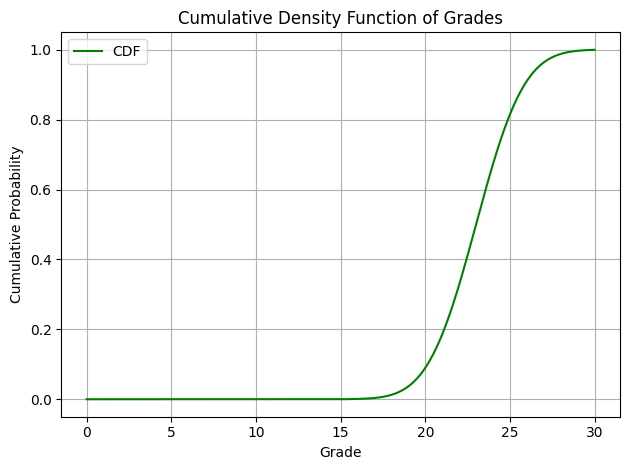

In [3]:
# 1.1 PDF and CDF of the grade of one student as Truncated Normal random variable

# First, we need scipy to represent this specific type of continuous random  variable
from scipy.stats import truncnorm

# Second, we need to state the parameters for the truncated normal distribution
mean = 23
variance = 5
std_dev = np.sqrt(variance)  # By definition
# And the truncation bounds
a = 0 # Lower bound
b = 30 # Upper bound

# According to probability theory and documentation, we have to scale the parameters
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
# The truncnorm function takes standardized bounds
a_std = (a - mean) / std_dev
b_std = (b - mean) / std_dev

# And now we are able to generate the truncated normal distribution
grade_dist = truncnorm(a=a_std, b=b_std, loc=mean, scale=std_dev)
print(type(grade_dist))
# Now we can start thinking about the plot

# Generate the range of x values within the support for the x axis of PDF and CDF
x_values = np.linspace(0, 30, num_experiment)

# Then, we can use the built-in methods of scipy.truncnorm to get PDF and CDF
# 1. Probability Density Function (PDF)
pdf_values = grade_dist.pdf(x_values) # ordered array of probabilities
# 2. Cumulative Density Function (CDF)
cdf_values = grade_dist.cdf(x_values) # ordered array of cumulated probabilities


# Finally, plotting

# Plot the PDF
plt.plot(x_values, pdf_values, color="blue", label="PDF")
plt.title("Probability Density Function of Grades")
plt.xlabel("Grade")
plt.ylabel("Probability Density")
plt.legend()
plt.tight_layout() # Ensures the two plots have same width
plt.grid()
plt.show()
# Plot the CDF
plt.plot(x_values, cdf_values, color="green", label="CDF")
plt.title("Cumulative Density Function of Grades")
plt.xlabel("Grade")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.tight_layout() # Ensures the two plots have same width
plt.grid()
plt.show()


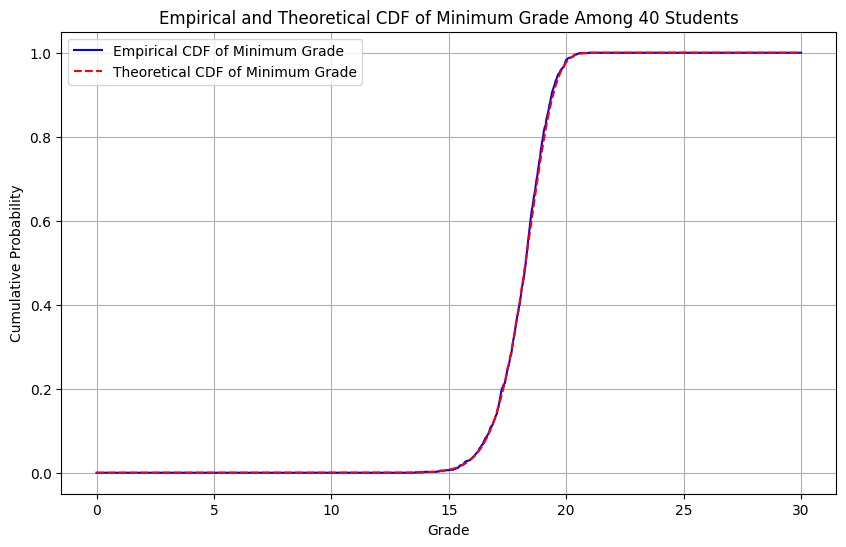

In [4]:
# 1.2 Simulation to estimate the CDF of the Minimum Grade, to compare with its theoretical value

n_students = 40

# How does the simulation work?
# First, we generate the grades of the 40 students (according to a truncated normal)
# Second, we store the minimum value of said simulation
# Then, we repeat this for num_experiment times
# Finally, from results vector we compute its CDF

# Create an empty array to store the minimum grade from each simulation
min_grades = np.zeros(num_experiment)

for i in range(num_experiment):
    # Generate grades for 40 students
    grades_exp = grade_dist.rvs(size=n_students)
    # Record the minimum grade from this experiment
    min_grades[i] = np.min(grades_exp)

# 2. Calculate Empirical CDF of Minimum Grades
# Define a range of x-values for plotting the CDF
x_values = np.linspace(0, 30, num_experiment)

# Empirical CDF: first, sort the minimum grades
min_grades_sort = np.sort(min_grades)
empirical_cdf = np.zeros(len(x_values))
# Then, build an array of the percentage of values below a certain threshold in the interval [0, 30]
for i in range(len(x_values)):
  empirical_cdf[i] = np.mean(min_grades <= x_values[i])
# Alternative expression: empirical_cdf = [np.mean(min_grades <= x) for x in x_values]
# By using np.mean, it divides the number of values for which the condition is "True" by the total number

# Now, what's the theoretical CDF of the Minimum Grade?
# Given a set of independent random variables (like different exam sessions), M=Min(X1, X2, X3, ...) is itself a random variable.
# Using complementarity we can write P(M<=x) = 1 - P(M>x)
# P(M>x) the probability that all grades are greater than x (since we're dealing with minimums)
# Since this is an Independent and identically distributed ("i.i.d.") variables, this is exponential in the number of students:
# P(M>x) = (P(X>x))^n_students
# And this can now be written as (1 - F(X<=x))^n_students, F being CDF of the individual grade distribution

# Generate the values of the theoretical CDF for plotting from the values generated of the original CDF
theoretical_cdf = 1 - (1-grade_dist.cdf(x_values)) ** n_students

# Plotting
plt.figure(figsize=(10, 6))
# Plot the Empirical CDF
plt.plot(x_values, empirical_cdf, label="Empirical CDF of Minimum Grade", color="blue")
# Plot the Theoretical CDF
plt.plot(x_values, theoretical_cdf, label="Theoretical CDF of Minimum Grade", color="red", linestyle="--")
# Title and Labels
plt.title("Empirical and Theoretical CDF of Minimum Grade Among 40 Students")
plt.xlabel("Grade")
plt.ylabel("Cumulative Probability")
plt.legend()
# Show the plot
plt.grid()
plt.show()


In [5]:
# 1.3 Empirical and theoretical probability that minimum grade is in certain intervals

# Empirical Probability that the minimum grade is less than 18
prob_min_less_than_18_empirical = np.mean(min_grades < 18) # Like previous formula

# Empirical Probability that the minimum grade is between 18 and 20
prob_min_between_18_and_20_empirical = np.mean((min_grades >= 18)&(min_grades <= 20))

# As stated in the previous section, theoretical CDF of the minimum grade is given by:
# F_min(x) = 1 - (1 - F(x))^n
# with F(x) being the CDF of the truncated normal distribution.
# So, we just need to apply this formula by using .cdf(value)

# Probability that the minimum grade is less than 18 (theoretical)
prob_min_less_than_18_theoretical = 1 - (1 - grade_dist.cdf(18))**n_students

# Probability that the minimum grade is between 18 and 20 (theoretical)
prob_min_less_than_20_theoretical = 1 - (1 - grade_dist.cdf(20))**n_students
prob_min_between_18_and_20_theoretical = prob_min_less_than_20_theoretical - prob_min_less_than_18_theoretical

# Output the results
print("Empirical Probability that the minimum grade is less than 18:", prob_min_less_than_18_empirical)
print("Theoretical Probability that the minimum grade is less than 18:", prob_min_less_than_18_theoretical)
print("Empirical Probability that the minimum grade is between 18 and 20:", prob_min_between_18_and_20_empirical)
print("Theoretical Probability that the minimum grade is between 18 and 20:", prob_min_between_18_and_20_theoretical)

Empirical Probability that the minimum grade is less than 18: 0.397
Theoretical Probability that the minimum grade is less than 18: 0.3998853878794043
Empirical Probability that the minimum grade is between 18 and 20: 0.586
Theoretical Probability that the minimum grade is between 18 and 20: 0.5770523545090095


# 2. Calciatori Panini and best sister award [full marks: 10]
Back in the days when Francesca was young, she and her brother collected football stickers to attach to their albums (for reference, these are called the "Calciatori Panini Album"). Francesca knew that her brother and 2 of his friends were obsessed with the player Alberto Gilardino. Wishing to be a very nice sister, she decided to look for 3 stickers of Gilardino that she could gift to her brother and his friends. She knew that in the album there was space for 300 players, the stickers were sold in packets of 6 cards each, and each packet costed 0.25 cents. Each player had the same probability of appearing on a sticker and in a packet you can find the same player more than once.

Propose a simulation experiment that answers empirically the following questions:

1. What is the average number of packets she has to buy to be elected the "most lovely sister of the year" as a result of finding the deesired number of stickers of Gilardino? What is the average cost? And the median cost? [4]

2. Unfortunately, the mean does not tell us the full picture. Plot an estimate of the probability mass function of the number of packets she will have to buy for her gift. [2]

3. Plot the distribution function of her costs. What is the probability that she will end up paying more than 80 euros to fullfill her dream? [2]

4. After having done these calculations, little Francesca is a bit concerned about her expenses. What should be the probability of finding Gilardino on a sticker to know that her median expense does not exceed 4 euros? To reply to this, consider possible probabilities that range from 1/100 to 1/10 with steps of 0.01. Once you have computed the median for each of these probabilities $p$, plot $p$ vs the corresponding median and draw an horizontal line to indentify the value 4 for the median. [2]

In [6]:
# 2.1 Experiment on the numbers of packets needed to find 3 "Alberto Gilardino"

n_packet = 6
n_players = 300
target_Gilardino = 3
exp = 0
single_cost = 0.25

# The objective is to collect to identical specific stickers - of "Alberto Gilardino"
# A "packet" is a collection of 6 stickers from a possible choice of 300, multiple selection allowed
# We use stats.randint to generate possible packets

# Gilardino is the BEST player, so we assign to him number 1!
# One experiment goes like the following:
# We generate a packet and check if there's number 1 (Gilardino)
# We count how many Gilardino we find and we stop once we find the third
# This experiment is then repeated n_experiment = 1000 times
# Said results will go in a vector of 1000 numbers
# Of that vector, we will compute mean and stardard deviation
# Average and median cost are a direct function of that

# We will store experiment results here
results = np.zeros(num_experiment)

for i in range(0,num_experiment):
  # Zeroing counters before the next test
  num_Gilardino = 0
  bought_packets = 0
  # print('Test n.'+str(i+1))
  while num_Gilardino < target_Gilardino:
    # Generate packet
    X = stats.randint.rvs(1, n_players+1, size=n_packet)
    # Count of bought packets
    bought_packets = bought_packets + 1
    # Check and count of "Alberto Gilardino" found:
    if 1 in X:
      num_Gilardino += 1
  # Store the number of packets needed for experiment i
  results[i] = bought_packets

#print('Final test vector: ' + str(results))
#print(results) # Uncomment to check the vector
mean = np.mean(results)
print('Mean number of packets: ' + str(mean))
std = np.std(results)
print('Standard deviation of packets: ' + str(std))
avg_cost = mean * single_cost
print('Average cost: ' + str(avg_cost))
sorted_result = np.sort(results)
# print(sorted_result) # Uncomment to check the vector
print('Median cost is ' + str(sorted_result[int(num_experiment/2 - 1)]))
# Not using print(np.median(sorted_result)) to show I'm not blindly copying an AI output



Mean number of packets: 146.517
Standard deviation of packets: 83.20426498082897
Average cost: 36.62925
Median cost is 131.0


Maximum number of packets needed according to the simulation is 677.0
Minimum number of packets needed according to the simulation is 9.0
So, we count a maximum possible value of677 , and a minimum of 9.0
1000


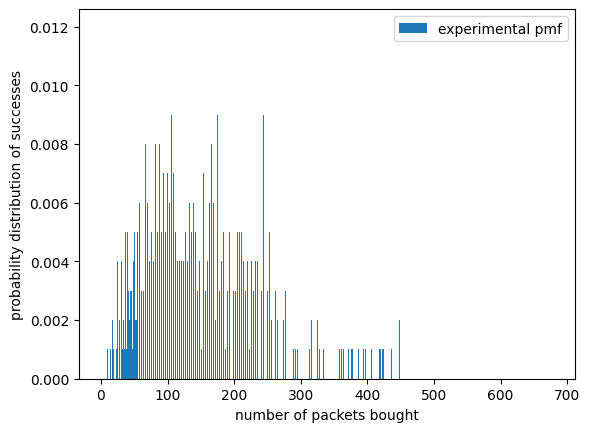

In [7]:
# 2.2 PMF Empirical estimation

# Plotting estimate of pmf is basically plotting how many times a specific number of packets is needed
# This according to the experiment performed in part 2.1

# First of all, we plot in the range of packets number obtained in the simulation
max_pack = np.max(results)
print('Maximum number of packets needed according to the simulation is ' + str(max_pack))
min_pack = np.min(results)
print('Minimum number of packets needed according to the simulation is ' + str(min_pack))

# Then, let's initialize a vector of the possible values of the experiment
pmf = np.zeros(int(max_pack))
print('So, we count a maximum possible value of' + str(len(pmf)) + ' , and a minimum of ' + str(min_pack))
#print(results) # Uncomment to check the vector
# Index of pmf is a possible number of packets needed
print(len(results))
for i in range(len(pmf)):
  pmf[i] = np.sum(sorted_result == i) / num_experiment
# For each possible number, we count how many times that was experimentally the number of packets needed
# This is then scaled by the number of experiment

# print(pmf) # Uncomment to check the vector
plt.bar(np.arange(1,max_pack+1), pmf, label = 'experimental pmf')
plt.xlabel('number of packets bought')
plt.ylabel('probability distribution of successes')
plt.legend()
plt.show()



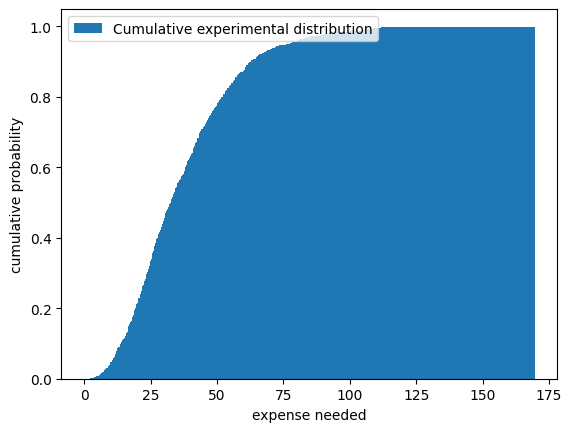

Probability of spending more than 80 euros is 4.0999999999999925%


In [8]:
# 2.3 Cost distribution function

# For distribution function, we need to sum the costs for each possible required amount of packets bought
# Cost is a fixed proportion of number of packets
# Therefore, the pmf is simply scaled by 0.25 in the x dimension
cost_pmf = pmf
# From this, we build the distribution function
dist_cost = np.zeros(len(cost_pmf))
for i in range(len(cost_pmf)):
  dist_cost[i] = np.sum(cost_pmf[0:i+1])
# print(dist_cost) # Uncomment to check the vector
# Keep in mind that dist_cost still has index equal to the number of packets
# We simply scaled in the plot by the cost factor 0.25

plt.bar(np.arange(1*single_cost, (max_pack+1)*single_cost, single_cost), dist_cost, label = 'Cumulative experimental distribution')
plt.xlabel('expense needed')
plt.ylabel('cumulative probability')
plt.legend()
plt.show()

# Now, probability of paying more than 80 euros is 1 - P(cost<=80 euros)
# But 80 / single_cost = 80 / 0.25 = 320 packets
# Which is, 1 - P(n_packets <= 320 packets)
Prob_more_80_eur = 1 - dist_cost[319]
print('Probability of spending more than 80 euros is ' + str(Prob_more_80_eur*100) + '%')

[100.  50.  33.  25.  20.  16.  14.  12.  11.  10.]
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
[11.75  5.75  4.    3.25  2.5   2.25  2.    1.75  1.5   1.5 ]


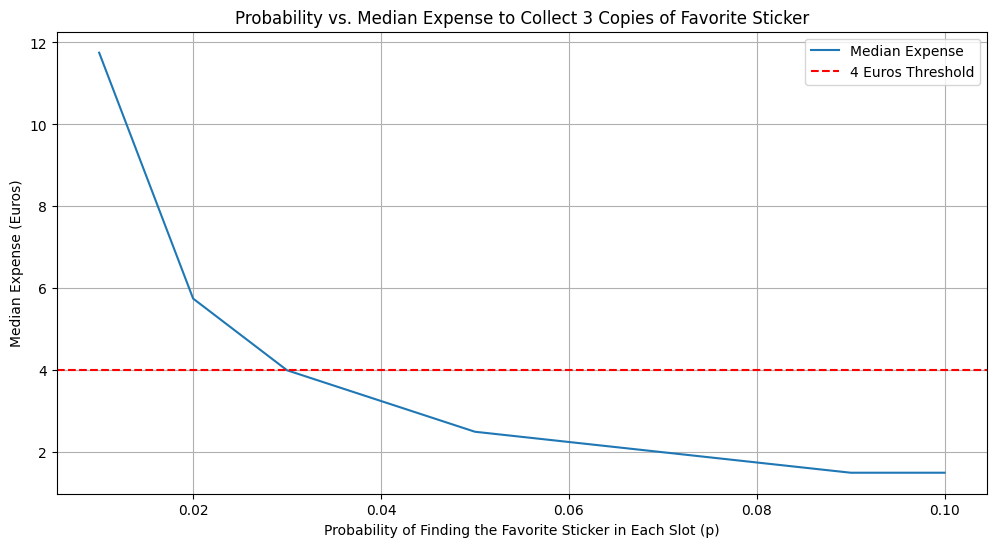

In [9]:
# 2.4 Probability to have a median expense of 4 euros
import numpy as np
import matplotlib.pyplot as plt

# Create vector of probabilities
x_prob = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
# The inverse is the number of players
x_players = np.zeros(len(x_prob))
for i in range(len(x_prob)):
  x_players[i] = int(1./x_prob[i])
print(x_players)
print(x_prob)
# Linspace seemed to not give the exact integers, so I chose this method instead

# Initialize vector of median expenses
median_expenses = np.zeros(len(x_prob))

# For this simulation we need a unique function of packets purchases
def exp_sticker_search(p, num_stickers_per_packet, target_count, num_experiment):
  results = np.zeros(num_experiment)
  for i in range(0, num_experiment):
    # Zeroing counters before the next test
    num_ticket = 0
    bought_packets = 0
    while num_ticket < target_count:
      # Generate packet
      X = stats.randint.rvs(1, p+1, size=num_stickers_per_packet)
      # Count of bought packets
      bought_packets = bought_packets + 1
      # Check and count of "Alberto Gilardino" found:
      if 1 in X:
        num_ticket += 1
        # Store the number of packets needed for experiment i
    results[i] = bought_packets
  return results

for p in range(len(x_prob)):
    # Simulate the number of packets needed for the current probability
    packets_needed = exp_sticker_search(x_players[p], n_packet, target_Gilardino, num_experiment)
    median_packets = np.median(packets_needed)  # Median number of packets needed
    median_expense = median_packets * single_cost  # Convert packets to cost
    median_expenses[p] = median_expense # This write into the vector of medians

print(median_expenses)
# We see that the limit is 33 players, almost 10 times less than the actual number!

# Plot p-values vs median expense
plt.figure(figsize=(12, 6))
plt.plot(x_prob, median_expenses, label='Median Expense')
plt.axhline(4, color='r', linestyle='--', label='4 Euros Threshold')
plt.xlabel("Probability of Finding the Favorite Sticker in Each Slot (p)")
plt.ylabel("Median Expense (Euros)")
plt.title("Probability vs. Median Expense to Collect 3 Copies of Favorite Sticker")
plt.legend()
plt.grid(True)
plt.show()


# 3 Let's make this bank not go bankrupt [full marks: 10]

You are running a small bank which has loaned 2000 loans to its customers. You are concerned about the probability of these loans defaulting in the incoming year, so you decide to use your PSP knowledge to figure out how likely it is that, under "normal" conditions of the market, too many loans default.

1. To start with, you assume that loans all have the same probability of defaulting in the incoming year equal to 0.005 and they all behave independently of each others. What is the expected number of defaulting loans? What is the probability than more than 1% of the loans default? To solve this, you can either simulate things numerically or give the exact answer using the methods that we have seen for random variables. [5]

2. Now that you have established a baseline probability, you know that reality is a bit more complicated than that, so you want to compute the same two quantities (expected value and probability than more than 1% of the loans default) for the 2000 loans, but this time you assume that 100 of them have probability of default 0.01, 900 have probability of default 0.008 and 1000 have probability of default 0.005. You can run experiments to answer the question, but full marks will be given to an answer that uses the methods that we have seen for random variables and the distributions/theorems that we have seen during the course. [3]

3. Again, we spicy it up to make it more realistic. This time, the second and third group of loans are like in point 2 (i.e. the groups with 900 and 1000 loans), but the first group of 100 loans behaves slightly differently: the first 2 loans of group 1 have probability 0.1 of defaulting and, if these first 2 loans default, then all the other 90 will default too, while if the first 2 loans do not default, then the others default independently with probability 0.01. Compute the expected number of defaulting loans and the probability than more than 1% of the loans default. For this answer, you can use a sampling method. [2]

In [ ]:
# 3.1 Expected number and CDF of loans failure

from scipy.stats import binom, norm
P_fail = 0.005 # Probability of a loan defaulting
n_loans = 2000 # Total number of loans
threshold = 0.01   # Threshold for "more than 1%" defaults

# We can consider this random variable as having a binomail distribution with n = n_loans, p = P_fail
# Therefore, expected defaults are E[X] = n * p
expected_defaults = n_loans * P_fail

# How many loans default if actual rate of failure is 1%?
threshold_failure = n_loans * threshold
print('1% failure means a threshold of ' + str(threshold_failure) + ' loans')
# We can say that P(failures > 20) = 1 - P(failures <= 20)
# And P(failures <= 20) is the CDF computed in 20
# Scipy.stats easily allows us to compute the theoretical value
prob_loans = stats.binom(n_loans, P_fail)
prob_over_20_exact = 1 - prob_loans.cdf(threshold_failure)
# For reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
# Experimentally, we need to simulate the number of defaults over a large number of trials to estimate P(X > 20)
simulated_defaults = binom.rvs(n_loans, P_fail, size=num_experiment*20)  # Simulate binomial outcomes
# Running the code multiple times I noticed that simulated probability varies quite a lot from 0 to 0.5% with 1000 experiments
# This suggests that, in this case, that is too little. So we go with 20000
# That is 10 times the actual number of loans
prob_more_than_1pct_simulation = np.mean(simulated_defaults > 20)  # Calculate empirical probability

# Output the results
print("Expected number of defaults:", expected_defaults)
print("Exact probability that more than 1% of loans default (normal approximation) is", prob_over_20_exact*100, '%')
print("Simulated probability that more than 1% of loans default is ", prob_more_than_1pct_simulation*100, '%')

1% failure means a threshold of 20.0 loans
Expected number of defaults: 10.0
Exact probability that more than 1% of loans default (normal approximation) is 0.15419897502486624 %
Simulated probability that more than 1% of loans default is  0.135 %


In [ ]:
# 3.2 Expected number and CDF of failures for loans in three groups

# Parameters for each loan group and their probabilities of default
n1, p1 = 100, 0.01    # Group 1: 100 loans with p = 0.01
n2, p2 = 900, 0.008   # Group 2: 900 loans with p = 0.008
n3, p3 = 1000, 0.005  # Group 3: 1000 loans with p = 0.005

# 1. Analytical Calculation of Expected Defaults and Probability
# Expected number of defaults for each group: E[X_i] = n_i * p_i
expected_X1 = n1 * p1
expected_X2 = n2 * p2
expected_X3 = n3 * p3
# The total expected number of defaults across all groups is simply a sum
# Since the groups behave independently
expected_defaults_total = expected_X1 + expected_X2 + expected_X3

# Variance of defaults for each group according to the theory for Bernoulli distribution: Var(X_i) = n_i * p_i * (1 - p_i)
# Reference: https://en.wikipedia.org/wiki/Binomial_distribution
var_X1 = n1 * p1 * (1 - p1)
var_X2 = n2 * p2 * (1 - p2)
var_X3 = n3 * p3 * (1 - p3)

# Variance works the same way (since groups are independent, covariance is zero)
total_variance = var_X1 + var_X2 + var_X3
std_dev_total = np.sqrt(total_variance)  # Standard deviation for the total defaults

# For the theoretical computation, the distribution becomes a Poisson binomial
# This didn't seem to work with scipy.stats
# So, we approximate to a Poisson distribution
Poisson_approx = stats.poisson(mu=expected_defaults_total)
# From this, P(X>20) = 1 - P(X<=20), and P(X<=20) = Poisson.cdf(20)
prob_more_than_1pct_theor = 1 - Poisson_approx.cdf(20)

# Now let's do a numerical simulation

# Number of simulations to estimate probability empirically
num_simulations = 20000
def simulate_defaults(num_simulations): # Generate random variables using scipy.stats
  defaults_1 = stats.binom.rvs(n1, p1, size=num_simulations)
  defaults_2 = stats.binom.rvs(n2, p2, size=num_simulations)
  defaults_3 = stats.binom.rvs(n3, p3, size=num_simulations)
  total_defaults = defaults_1 + defaults_2 + defaults_3
  return total_defaults

# Run simulations
num_simulations = 100000
simulated_defaults = simulate_defaults(num_simulations)
prob_more_than_1_percent = np.mean(simulated_defaults > (0.01 * (n1 + n2 + n3)))
print("The simulated probability that more than 1% of the loans default is ", prob_more_than_1_percent*100, '%')

# Output the results
print("Expected number of defaults:", expected_defaults_total)
print("Exact probability that more than 1% of loans default (Poisson approximation): ", prob_more_than_1pct_theor*100, '%')
print("Simulated probability that more than 1% of loans default: ", prob_more_than_1pct_theor*100, '%')

The simulated probability that more than 1% of the loans default is  2.793 %
Expected number of defaults: 13.2
Exact probability that more than 1% of loans default (Poisson approximation):  2.8737357233075134 %
Simulated probability that more than 1% of loans default:  2.8737357233075134 %


In [ ]:
# 3.3 Computation of expected value of failures and P(>1%) with conditionality

# Parameters
n1_first = 2            # First 2 loans in group 1 with p = 0.1
p1_first = 0.1          # Probability of default for the first 2 loans in group 1
n1_rest = 98            # Remaining 98 loans in group 1 (100 total)
p1_rest = 0.01          # Default probability for the remaining 98 loans if the first 2 do not default
n2 = 900
p2 = 0.008     # Group 2: 900 loans with p = 0.008
n3 = 1000
p3 = 0.005    # Group 3: 1000 loans with p = 0.005

# Probabilities for each outcome of the first 2 loans in group 1
prob_both_default = 0.1 * 0.1       # Probability both default
prob_both_no_default = 0.9 * 0.9    # Probability both do not default
prob_one_default = 2 * 0.1 * 0.9    # Probability exactly one defaults

# Expected defaults in group 1 for each scenario
expected_defaults_both_default = n1_first + n1_rest
expected_defaults_both_no_default = 2 + n1_rest * p1_rest
expected_defaults_one_default = 1 + n1_rest * p1_rest

Total_expected_defaults = prob_both_default*expected_defaults_both_default \
+ prob_both_no_default*expected_defaults_both_no_default + \
prob_one_default*expected_defaults_one_default + n2*p2 + n3*p3

# Now we will compute P(fails>1%)
# Simulation parameters
num_simulations = 100000  # Number of simulation runs, 50 times the total number of loans

# Initialize variables to store total defaults across simulations
total_defaults = np.zeros(num_simulations)

# Simulation loop
for i in range(num_simulations):
    # Group 1: Simulate first 2 loans with probability 0.1
    defaults_first_2 = np.random.binomial(n1_first, p1_first)

    if defaults_first_2 == 2:
      # If both first loans default, all remaining 98 in group 1 default as well
      defaults_group_1 = n1_first + n1_rest
    else:
      # Otherwise, simulate the remaining 98 loans with probability 0.01
      defaults_group_1 = defaults_first_2 + np.random.binomial(n1_rest, p1_rest)

    # Group 2: Simulate defaults with probability 0.008
    defaults_group_2 = np.random.binomial(n2, p2)

    # Group 3: Simulate defaults with probability 0.005
    defaults_group_3 = np.random.binomial(n3, p3)

    # Total defaults for this simulation
    total_defaults[i] = defaults_group_1 + defaults_group_2 + defaults_group_3

# 1. Expected number of defaults (average over all simulations)
expected_defaults = np.mean(total_defaults)

# 2. Probability that more than 1% (i.e., >20) of loans default
prob_more_than_1pct = np.mean(total_defaults > 20)

# Output the results
print("Theoretical expected number of defaults is ", Total_expected_defaults)
print("Computed expected number of defaults is ", expected_defaults)
print("Probability that more than 1% of loans default is", prob_more_than_1pct*100, '%')


Theoretical expected number of defaults is  15.9702
Computed expected number of defaults is  14.39475
Probability that more than 1% of loans default is 4.18 %
